In [1]:
%matplotlib inline
%load_ext heat
import matplotlib.pylab as plt
import time
from math import pi, sin

In [2]:
num_steps = 100
scale = 50
damping= 0.25
initial_P = 250
stop_step = 100

In [3]:
def wave_propogation(num_steps, scale, damping, initial_P, stop_step):
    omega = 3 / (2 * pi)
    
    size_x = 2 * scale + 1
    size_y = 2 * scale + 1

    # V velocity
    # P presure
    # Initialization
    P = [[0.0 for x in range(size_x)] for y in range(size_y)]
    V = [[[0.0, 0.0, 0.0, 0.0] for x in range(size_x)] for y in range(size_y)]
    P[scale][scale] = initial_P
    for step in range(num_steps):
        if step <= stop_step:
            P[scale][scale] = initial_P * sin(omega * step)
        for i in range(size_y):
            for j in range(size_x):
                V[i][j][0] = V[i][j][0] + P[i][j] - P[i - 1][j] if i > 0 else P[i][j]
                V[i][j][1] = (V[i][j][1] + P[i][j] - P[i][j + 1] if j < size_x - 1 else P[i][j])
                V[i][j][2] = (V[i][j][2] + P[i][j] - P[i + 1][j] if i < size_y - 1 else P[i][j])
                V[i][j][3] = V[i][j][3] + P[i][j] - P[i][j - 1] if j > 0 else P[i][j]

        for i in range(size_y):
            for j in range(size_x):
                P[i][j] -= 0.5 * damping * sum(V[i][j])
    return P


2.14 Sec, 46.80 Hz


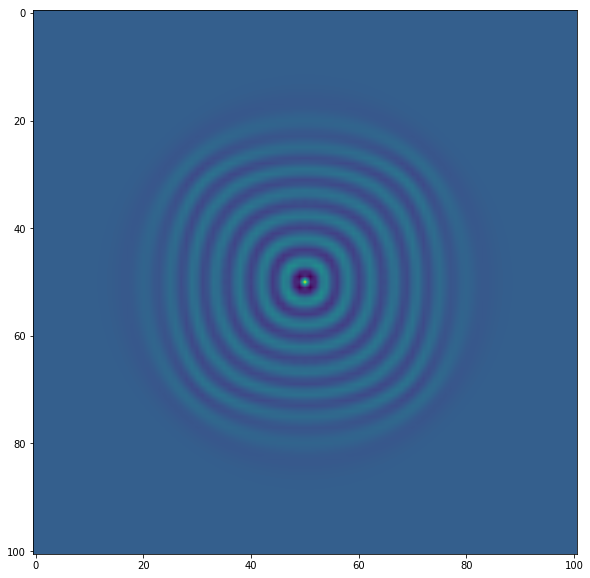

In [4]:
plt.figure(figsize=(10,10))
start = time.time()
pressure = wave_propogation(num_steps,scale,damping,initial_P,stop_step)
stop = time.time()
print(f"{stop - start:.2f} Sec, {num_steps / (stop - start):.2f} Hz")
plt.imshow(pressure,cmap='viridis_r',interpolation='bilinear')

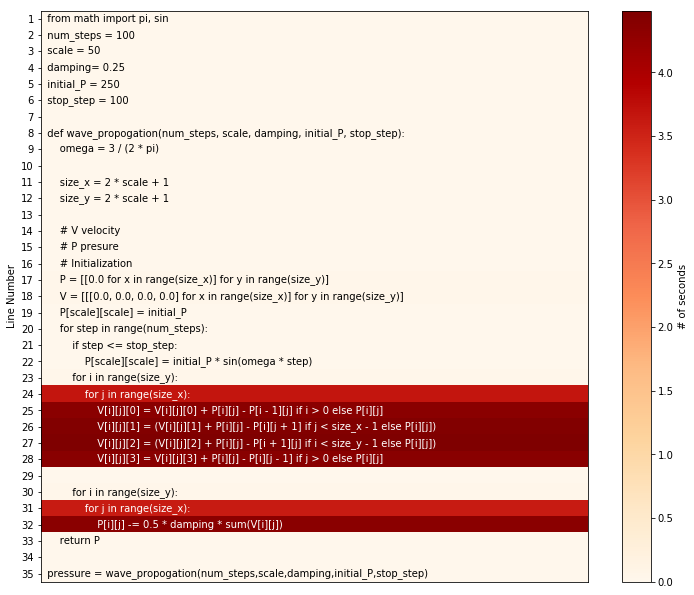

In [5]:
%%heat
from math import pi, sin
num_steps = 100
scale = 50
damping= 0.25
initial_P = 250
stop_step = 100

def wave_propogation(num_steps, scale, damping, initial_P, stop_step):
    omega = 3 / (2 * pi)
    
    size_x = 2 * scale + 1
    size_y = 2 * scale + 1

    # V velocity
    # P presure
    # Initialization
    P = [[0.0 for x in range(size_x)] for y in range(size_y)]
    V = [[[0.0, 0.0, 0.0, 0.0] for x in range(size_x)] for y in range(size_y)]
    P[scale][scale] = initial_P
    for step in range(num_steps):
        if step <= stop_step:
            P[scale][scale] = initial_P * sin(omega * step)
        for i in range(size_y):
            for j in range(size_x):
                V[i][j][0] = V[i][j][0] + P[i][j] - P[i - 1][j] if i > 0 else P[i][j]
                V[i][j][1] = (V[i][j][1] + P[i][j] - P[i][j + 1] if j < size_x - 1 else P[i][j])
                V[i][j][2] = (V[i][j][2] + P[i][j] - P[i + 1][j] if i < size_y - 1 else P[i][j])
                V[i][j][3] = V[i][j][3] + P[i][j] - P[i][j - 1] if j > 0 else P[i][j]

        for i in range(size_y):
            for j in range(size_x):
                P[i][j] -= 0.5 * damping * sum(V[i][j])
    return P

pressure = wave_propogation(num_steps,scale,damping,initial_P,stop_step)